# Importing of classes #

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from IPython.display import display
import joblib
from sklearn import ensemble
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Data Exploration and Reading # 
The data is about predicting the price of the flight tickets. The data is given in the form of a csv file. The data is read using the pandas library. The data is then explored to get a better understanding of the data.

### Importing the dataset 

In [2]:
data = pd.read_csv('Data/heart_data.csv')
print(data)

       index     id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  \
0          0      0  18393       2     168    62.0    110     80            1   
1          1      1  20228       1     156    85.0    140     90            3   
2          2      2  18857       1     165    64.0    130     70            3   
3          3      3  17623       2     169    82.0    150    100            1   
4          4      4  17474       1     156    56.0    100     60            1   
...      ...    ...    ...     ...     ...     ...    ...    ...          ...   
69995  69995  99993  19240       2     168    76.0    120     80            1   
69996  69996  99995  22601       1     158   126.0    140     90            2   
69997  69997  99996  19066       2     183   105.0    180     90            3   
69998  69998  99998  22431       1     163    72.0    135     80            1   
69999  69999  99999  20540       1     170    72.0    120     80            2   

       gluc  smoke  alco  a

#### Columns of Dataset
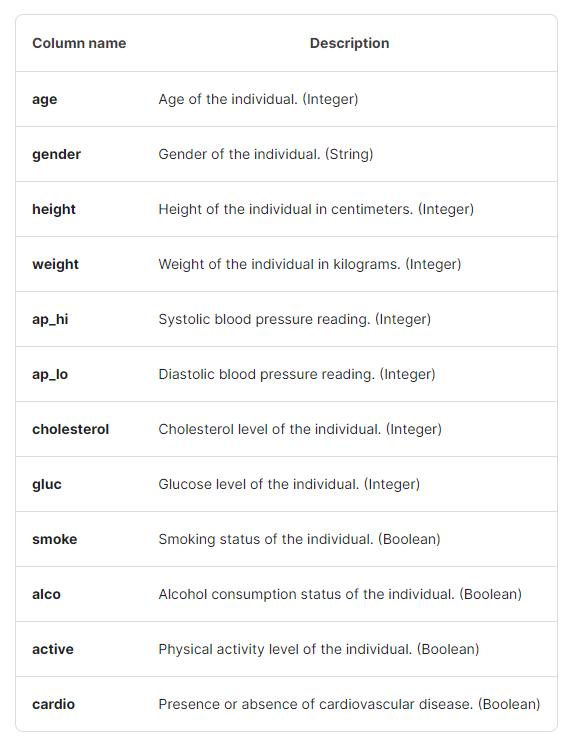\
As it can be seen in the image above, the columns of the dataset has these meanings:
* age: Age of the participant
* gender: Gender of the participant in terms of binary(1/2). 1 being Male and 2 being Female.
* height: Height of the participant in centimeters.
* weight: Weight of the participant in kilograms.
* ap_hi: Systolic blood pressure.
* ap_lo: Diastolic blood pressure.
* cholesterol: Cholesterol level in the blood.
* gluc: Glucose level in the blood.
* smoke: Whether the participant smokes or not.
* alco: Whether the participant drinks alcohol or not.
* active: Whether the participant is active or not.
* cardio: Whether the participant has cardiovascular disease or not.

### Dataset cleaning
- Assumption:
     - Based off my knowledge, it can be seen that index and id can be deleted as these 2 columns are just 2 unique identifiers and does not affect the learning process

In [3]:
#Remove the Unnamed: 0 column from the dataset
del data['index']
del data['id']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


#### Checking for Missing Data

In [4]:
data.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

#### Checking for Outliers
This is to check for outliers in the data. The outliers are removed using the IQR method.

In [5]:
data.shape

(70000, 12)

In [6]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age            3663.0
gender            1.0
height           11.0
weight           17.0
ap_hi            20.0
ap_lo            10.0
cholesterol       1.0
gluc              0.0
smoke             0.0
alco              0.0
active            0.0
cardio            1.0
dtype: float64


In [7]:
print((data < (Q1 - 1.5 * IQR))) and ((data > (Q3 + 1.5 * IQR)))

         age  gender  height  weight  ap_hi  ap_lo  cholesterol   gluc  smoke  \
0      False   False   False   False  False  False        False  False  False   
1      False   False   False   False  False  False        False  False  False   
2      False   False   False   False  False  False        False  False  False   
3      False   False   False   False  False  False        False  False  False   
4      False   False   False   False  False   True        False  False  False   
...      ...     ...     ...     ...    ...    ...          ...    ...    ...   
69995  False   False   False   False  False  False        False  False  False   
69996  False   False   False   False  False  False        False  False  False   
69997  False   False   False   False  False  False        False  False  False   
69998  False   False   False   False  False  False        False  False  False   
69999  False   False   False   False  False  False        False  False  False   

        alco  active  cardi

Looking at the table, it can be seen that there are some outliers in the active and ap_lo column. The outliers are removed using the IQR method.

In [8]:
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [9]:
data.shape 

(38023, 12)

As it can be seen, the outliers are removed.

In [10]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
6,22113,1,157,93.0,130,80,3,1,0,0,1,0
8,17668,1,158,71.0,110,70,1,1,0,0,1,0


As it can be seen in here, the age is not a value that is what we want. The value of age is in a value that is not desired.

#### Feature Engineering
- Convert the interger value in age to a value that is desired which is years.
- Assumption:
    - The integer value in age is considered as the number of days they are alive from birth.
    - Hence, we take the value in the column and divide it by 365 to get the age in years

In [11]:
data['age'] = data['age'] / 365
data['age'] = data['age'].astype(int)

In [12]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
6,60,1,157,93.0,130,80,3,1,0,0,1,0
8,48,1,158,71.0,110,70,1,1,0,0,1,0


### Feature Engineering Conclusion
The reason for needing to do feature engineering is because the value of age is not in a value that is desired. Hence, the value of age is changed to a value that is desired which is years.

### Data Cleaning Conclusion
The dataset is overall really clean with no missing data. However, the value of age is not suited to do training. Hence, there is a need\
to change the value of age into a integer that is rounded up.



## Data Exploration
The data exploration is done to get a better understanding of the data. The data is explored using the plotlib library. The data is explored using the following methods:
- Histogram
- Scatter plot
- Box plot


##### Histogram of the age

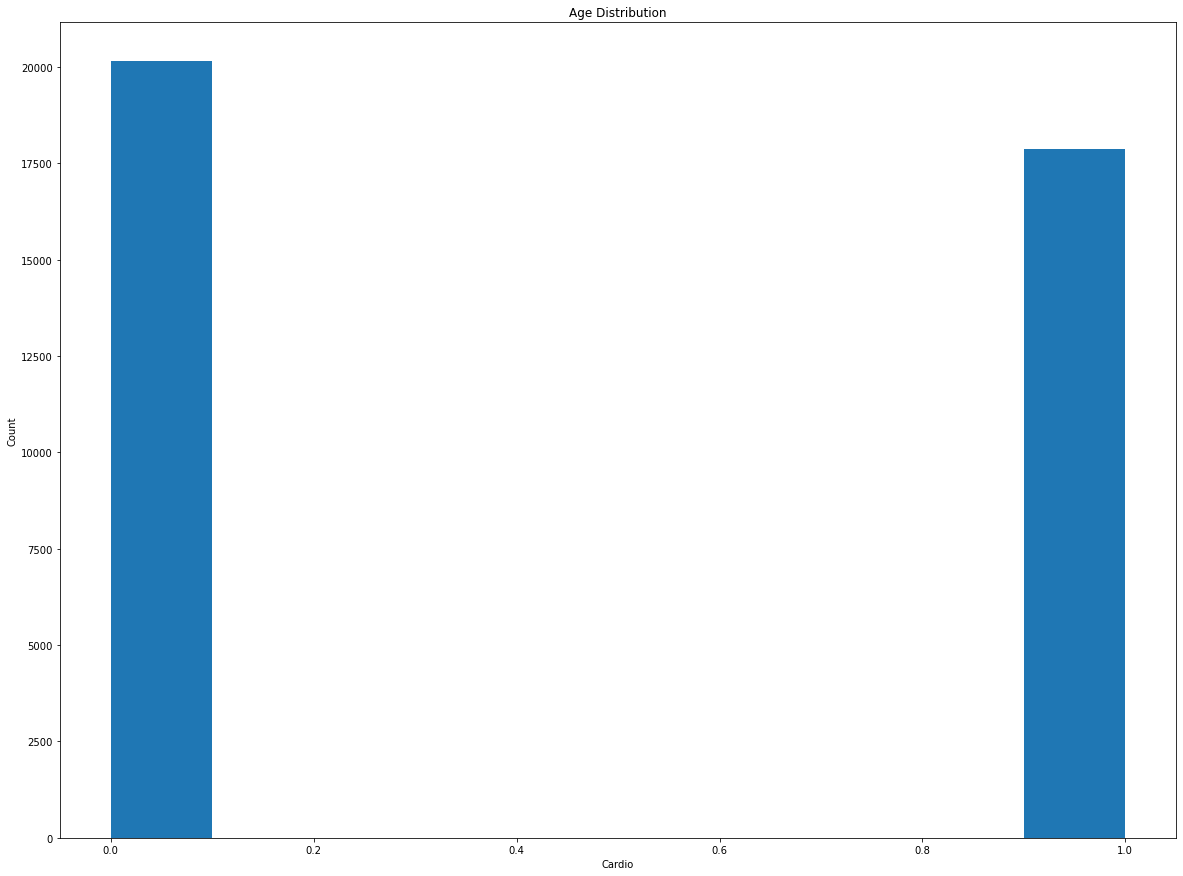

In [18]:
plt.figure(figsize=(20,15))
plt.hist(data['cardio'], bins=10)
plt.xlabel('Cardio')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

#### Histogram conclusion
To conclude, the age of 50-55 and around 58-60 are the highest frequency in the dataset.

#### Scatter Plot of Ap_hi and Ap_lo with the feature Cardio as an indicator
- The ap_hi and ap_lo are the blood pressure of the patient. The cardio is the indicator of whether the patient has a heart disease or not.
    - 0 = No heart disease
    - 1 = Heart disease
    - Assumption: 
        - The yellow dots indicate 1 which is heart disease and the purple dots indicate 0 which is no heart disease.

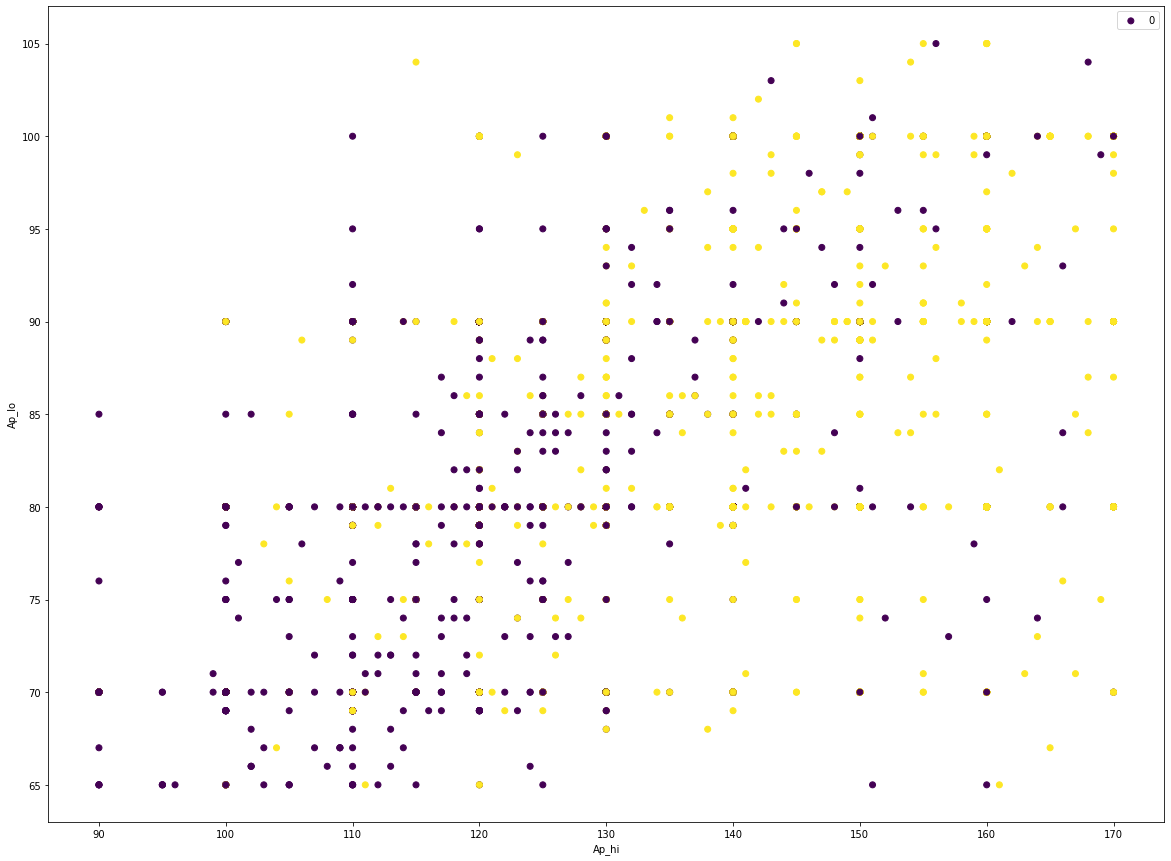

In [14]:
plt.figure(figsize=(20,15))
plt.scatter(data['ap_hi'],data['ap_lo'], c =data['cardio'])
plt.xlabel('Ap_hi')
plt.ylabel('Ap_lo')
plt.legend(data['cardio'])
plt.show()

#### Scatter Plot Conclusion
As it can be seen in the scatter plot, the spread of the cardio being 1 is found more towards the higher Ap_hi and Ap_lo. This is because the higher the blood pressure, the higher the chance of having a heart disease.


#### Histogram of Price

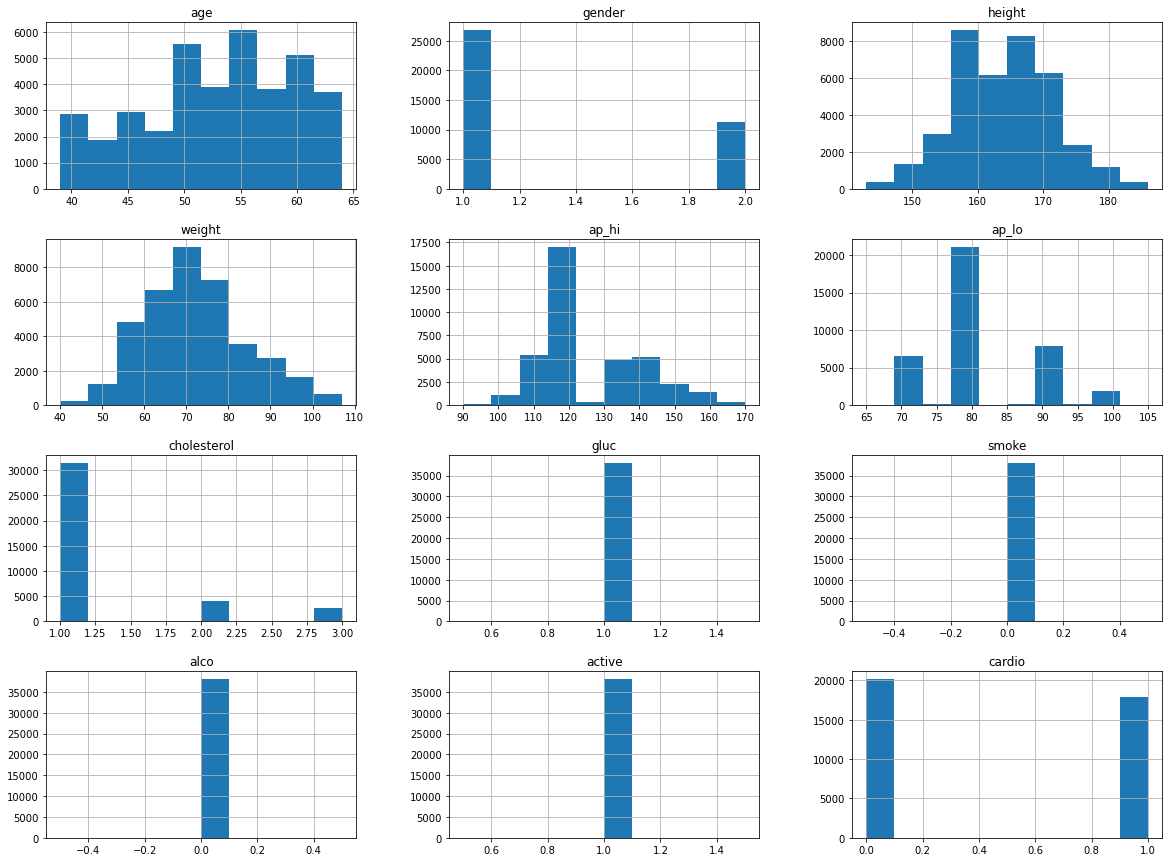

In [15]:
histogram = data.hist(bins=10, figsize=(20,15))

#### Histogram Conclusion
This historgram shows all the frequency of the features. It can be seen that the most frequent feature is the age of 50-55 and around 58-60.\
Through this data, it can be seen that this dataset is mostly taken from people around the age of 50-60.\
The dataset also shows that majority of the people do not smoke or drink alcohol.\
The dataset also shows that half of the people have heart disease according to the histogram cardio. It shows that the value 1 and 0 has the same frequency.\
The dataset also shows that majority of the people do not have diabetes.\
The dataset also shows that majority of the people do not have high blood pressure.\
The dataset also shows that majority of the people do not have high cholesterol.

#### Scatter Plot of Height and Weight with the feature Cardio as an indicator

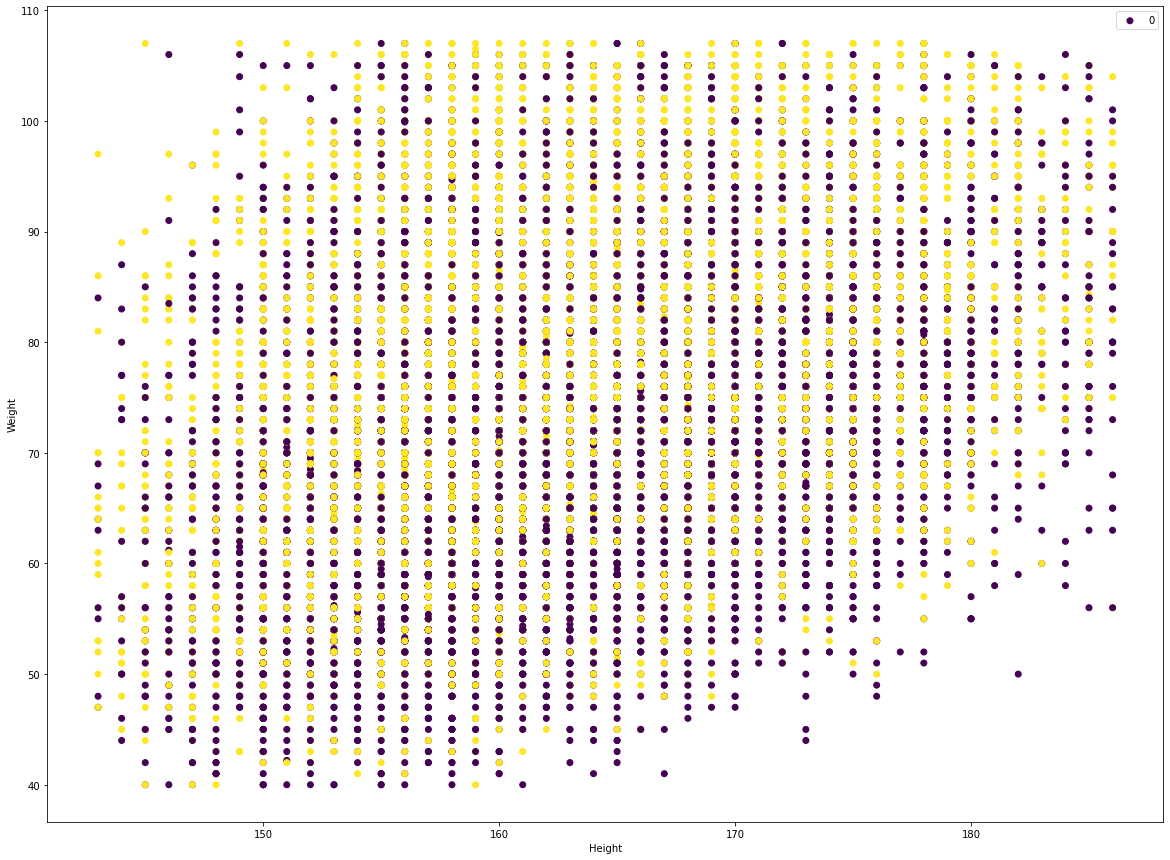

In [16]:
plt.figure(figsize=(20,15))
plt.scatter(data['height'], data['weight'], c = data['cardio'], )
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(data['cardio'])
plt.show()

#### Scatter Plot Conclusion
It can be seen that the purple dots which is the no heart disease is more spread out than the yellow dots which is the heart disease.\
It can also be seen that people with a heavier weight has a higher chance of having heart disease.\
This is because, from the scatter plot, the yellow dots populate the graph at the areas where the weight is higher.


#### Box Plot Grouped by Airline and Price

<AxesSubplot: title={'center': 'weight'}, xlabel='age'>

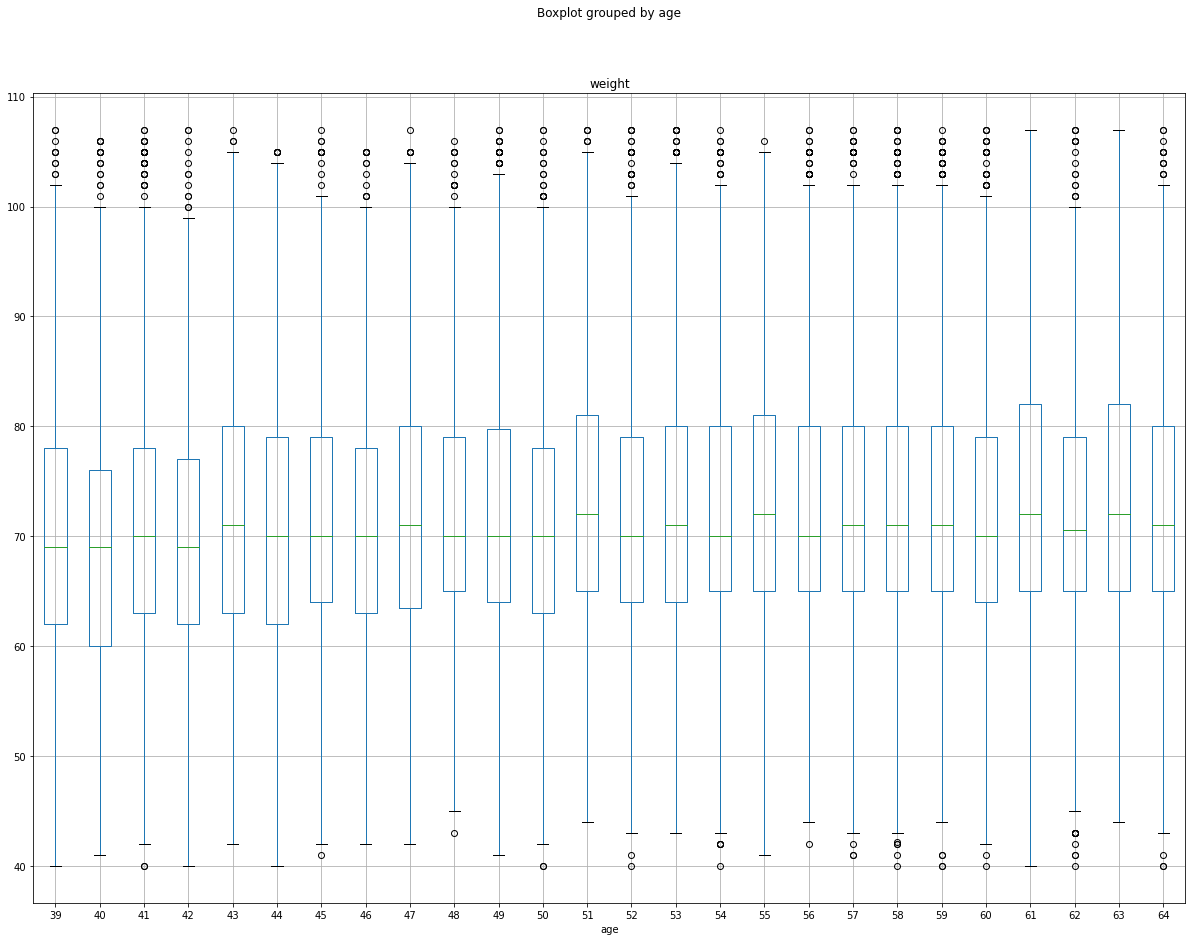

In [17]:
data.boxplot(column='weight', by='age', figsize=(20,15))

#### Box Plot Conclusion
The box plot shows that the ages of 54, 61 and 63 has the highest weight based of the median of the weights in the age group.

#### Scatter Plot of Age and Height with the feature Cardio as an indicator

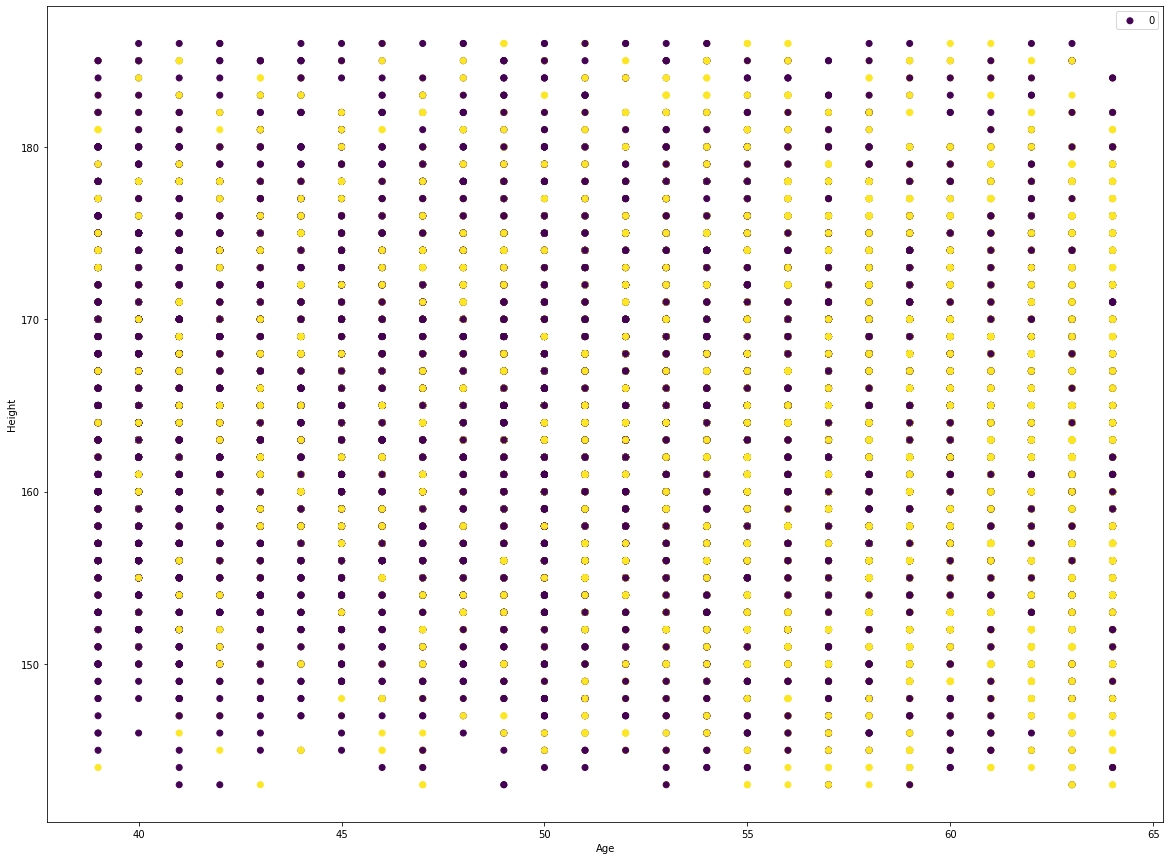

In [19]:
plt.figure(figsize=(20,15))
plt.scatter(data['age'], data['height'], c = data['cardio'], )
plt.xlabel('Age')
plt.ylabel('Height')
plt.legend(data['cardio'])
plt.show()

#### Scatter Plot Conclusion
It can be seen that the purple dots which is the no heart disease is more spread out than the yellow dots which is the heart disease.\
It can also be seen that people with a higher age has a higher chance of having heart disease.\
This is because, from the scatter plot, the yellow dots populate the graph at the areas where the age is higher.

# Start of the Machine Learning Process
1. Remove the column cardio, because it is the column that we are going to predict.
2. Split the data into training and testing data.
3. Train the model using the training data.
4. Test the model using the testing data.
5. Evaluate the model using the accuracy score.
6. Choose the best model.
7. Choose the right features for the model.
7. Do a grid search of the model to find the best parameters.

### Splitting the data into train and test data

Assumption:
The train_size of the code should be 70% of the code. This is to allow more data to be trained into the model.

1. Remove the column cardio, because it is the column that we are going to predict.

In [20]:
#Splits the new data into training and testing sets
y = data['cardio'].values
del data['cardio']
X = data.values 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=7)

## Training the Models
The models that are used are:
 - Decision Tree Classification
 - Random Forest Classification
 - Gradient Boosting Classifiers
 - Logistic Regressor
 ###
Assumption:
 - The models are chosen based off the data exploration and the data cleaning.
 - The models will be trained with the same random state and have additional parameters to allow the classifier to classify the large data and the best model will be chosen. The hyper parameters of the 3 classifiers will all be the same to ensure fairness in accuracy checking.
 - The models all have a hyper parameter to allow the acurracy to be accurate
 ###
Reason:
 - The reason classifiers are chosen is because the data that is being predicted is a true or false data. 
 - The data that is being predicted is not a continuous data. Hence, the classifiers are chosen.

In [25]:
DC = DecisionTreeClassifier(random_state=42, max_features= 0.3, max_depth= 6, min_samples_leaf= 3)
RC = RandomForestClassifier(random_state=42, max_features= 0.3, max_depth= 6, min_samples_leaf= 3)
GBC = GradientBoostingClassifier(random_state=42, max_features= 0.3, max_depth= 6, min_samples_leaf= 3)
LR = LogisticRegression(random_state=42, max_iter=700000)

TypeError: __init__() got an unexpected keyword argument 'max_features'

#### Fitting the regression models to the training data

In [22]:
LR.fit(X_train, y_train)
DC.fit(X_train, y_train)
RC.fit(X_train, y_train)
GBC.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=6, max_features=0.3, min_samples_leaf=3,
                           random_state=42)

#### Checking for accuracy of models

In [23]:
print(accuracy_score(y_test, LR.predict(X_test)))
print(accuracy_score(y_test, DC.predict(X_test)))
print(accuracy_score(y_test, RC.predict(X_test)))
print(accuracy_score(y_test, GBC.predict(X_test)))

0.7306916805470325
0.7273603927412992
0.732532655387043
0.7348119575699132


In [24]:
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, LR.predict(X_test)))
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, LR.predict(X_test)))

Confusion Matrix for Logistic Regression:
[[5008 1061]
 [2011 3327]]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77      6069
           1       0.76      0.62      0.68      5338

    accuracy                           0.73     11407
   macro avg       0.74      0.72      0.72     11407
weighted avg       0.73      0.73      0.73     11407



In [28]:
print("Confusion Matrix for Decision Tree Classifier:")
print(confusion_matrix(y_test, DC.predict(X_test)))
print("Classification Report for Decision Tree Classifier:")
print(classification_report(y_test, DC.predict(X_test)))

Confusion Matrix for Decision Tree Classifier:
[[5046 1023]
 [2087 3251]]
Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.71      0.83      0.76      6069
           1       0.76      0.61      0.68      5338

    accuracy                           0.73     11407
   macro avg       0.73      0.72      0.72     11407
weighted avg       0.73      0.73      0.72     11407



In [29]:
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test, RC.predict(X_test)))
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, RC.predict(X_test)))

Confusion Matrix for Random Forest Classifier:
[[5060 1009]
 [2042 3296]]
Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77      6069
           1       0.77      0.62      0.68      5338

    accuracy                           0.73     11407
   macro avg       0.74      0.73      0.73     11407
weighted avg       0.74      0.73      0.73     11407



In [31]:
print("Confusion Matrix for Gradient Boosting Classifier:")
print(confusion_matrix(y_test, GBC.predict(X_test)))
print("Classification Report for Gradient Boosting Classifier:")
print(classification_report(y_test, GBC.predict(X_test)))

Confusion Matrix for Gradient Boosting Classifier:
[[4938 1131]
 [1894 3444]]
Classification Report for Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.72      0.81      0.77      6069
           1       0.75      0.65      0.69      5338

    accuracy                           0.73     11407
   macro avg       0.74      0.73      0.73     11407
weighted avg       0.74      0.73      0.73     11407



In [30]:
print(mean_absolute_error(y_test, LR.predict(X_test)))
print(mean_absolute_error(y_test, DC.predict(X_test)))
print(mean_absolute_error(y_test, RC.predict(X_test)))
print(mean_absolute_error(y_test, GBC.predict(X_test)))

0.26930831945296746
0.2726396072587008
0.26746734461295696
0.2651880424300868


#### Conclusion of the models
Based of the accuracy scores and the mean absolute error.\
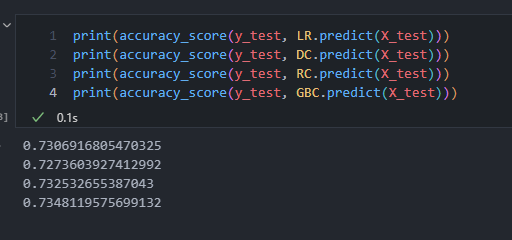\
We can see that Gradient Boosting Classifier has the highest accuracy score and the lowest mean absolute error.\
Hence, the Gradient Boosting Classifier is chosen as the best model.

### Halve Grid Search
This is to find out which parameters would work best with the Gradient Boosting Classifier
 - Assumption:
     - The param_grids are set to test these fields for the hyper parameters of gradient boosting
     - The grid search used is HalvingGridSearch. This is because the computing time of a normal GridSearch with over 30k rows of data will take too long. Hence, the HalvingGridSearch is used to reduce the computing time.

In [35]:
param_grid = {
    'n_estimators': [500, 1000, 3000],
    'max_depth': [4, 6],
    'min_samples_leaf': [3, 5, 9, 17],
    'learning_rate': [0.1, 0.05, 0.02, 0.01],
    'max_features': [1.0, 0.3, 0.1],
    'loss': ['log_loss', 'exponential']
}

# Create the model
model = GradientBoostingClassifier()

# Define the grid search we want to run. Run it with all cpus in parallel.
gs_cv = HalvingGridSearchCV(model, param_grid, n_jobs=-1, verbose=100)
gs_cv.fit(X_train, y_train)

# Print the parameters that gave us the best result!
print(gs_cv.best_params_)

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 109
max_resources_: 26616
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 576
n_resources: 109
Fitting 5 folds for each of 576 candidates, totalling 2880 fits
----------
iter: 1
n_candidates: 192
n_resources: 327
Fitting 5 folds for each of 192 candidates, totalling 960 fits
----------
iter: 2
n_candidates: 64
n_resources: 981
Fitting 5 folds for each of 64 candidates, totalling 320 fits
----------
iter: 3
n_candidates: 22
n_resources: 2943
Fitting 5 folds for each of 22 candidates, totalling 110 fits
----------
iter: 4
n_candidates: 8
n_resources: 8829
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 5
n_candidates: 3
n_resources: 26487
Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'learning_rate': 0.02, 'loss': 'exponential', 'max_depth': 4, 'max_features': 0.1, 'min_samples_leaf': 9, 'n_estimators': 500}


#### Conclusion
The reason for using halve grid search is because of the size of the data being too large.\
The halve grid search is used to reduce the computing time of the grid search.\
The assumptions will also not decrease the accuracy of the model.

#### Halve Grid Search Result
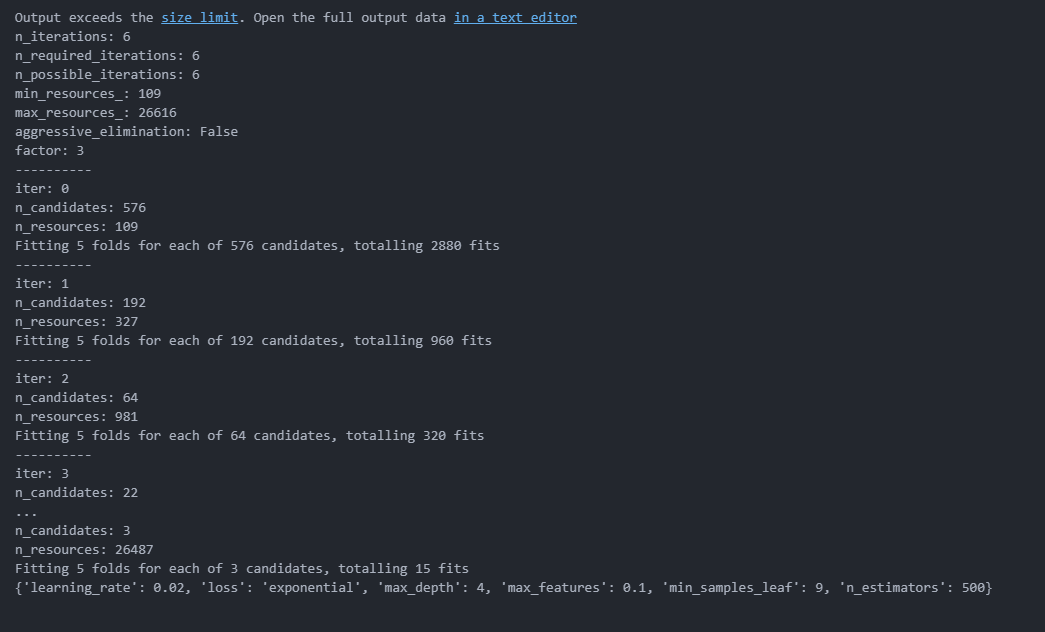\
The best parameters for the Gradient Boosting Classifier is:
 - learning_rate = 0.1
 - max_depth = 3
 - n_estimators = 100
 - subsample = 0.5

### Gradient Boosting Classifier
This is to find out which parameters would work best with the Gradient Boosting Classifier
 - This is to dump a model into a file to be used later on. The model will have the hyper parameters created from the grid search.
 - Afterwards, the importance of the features will be shown.
 - These features will later on be removed.

In [38]:
model = GradientBoostingClassifier(learning_rate= 0.02, loss = 'exponential', max_depth = 4, max_features = 0.1, min_samples_leaf= 9, n_estimators= 500)
model.fit(X_train, y_train)
joblib.dump(model, 'Model/heart_disease_model.pkl')

0.7358639431927764


['Model/heart_disease_model.pkl']

#### New Accuracy of the Gradient Boosting Classifier

In [39]:
print(mean_absolute_error(y_test, model.predict(X_test)))

0.26413605680722363


#### Conclusion
The hyper parameters allowed the model to have an increase in the accuracy by 0.1% which is a significant increase.\
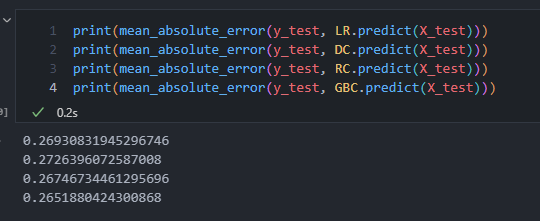\
As seen in the image, the previous mean absolute error for the Gradien Boosting Classifier, which is the last one, was 0.265188. The new mean absolute error is 0.26413.\

#### Choosing the best features from the Gradient Boosting Regressor
Any features that are under 1% are removed from the dataset.

In [37]:
model = joblib.load('Model/heart_disease_model.pkl')
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print("{} - {:.2f}%".format(data.columns[index], (importance[index] * 100.0)))

gluc - 0.00%
smoke - 0.00%
alco - 0.00%
active - 0.00%
gender - 0.19%
height - 1.55%
weight - 4.23%
cholesterol - 9.96%
age - 15.10%
ap_lo - 24.07%
ap_hi - 44.90%


#### Feature Importance
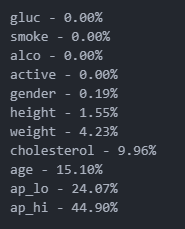\
As it can be seen in the image, these are the features that are important to the model in terms of percentage.\
The features that have a percentage under 1% will be removed from the dataset to see if the accuracy of the model will increase.


#### Removing the features that are not important
- Assumption:
    - The features that have a total percentage less than 0.1% will be removed from the dataset.
    - Reason:
        - The features that have a percentage less than 0.1% will be removed from the dataset as they are not important to the model.
    - Price column is the column that we are predicting.

In [18]:
del data['source_city']
del data['class']

data.head()

,airline,departure_time,stops,arrival_time,destination_city,duration,days_left,price
0,SpiceJet,Evening,zero,Night,Mumbai,2.17,1,5953
1,SpiceJet,Early_Morning,zero,Morning,Mumbai,2.33,1,5953
2,AirAsia,Early_Morning,zero,Early_Morning,Mumbai,2.17,1,5956
3,Vistara,Morning,zero,Afternoon,Mumbai,2.25,1,5955
4,Vistara,Morning,zero,Morning,Mumbai,2.33,1,5955


#### Retraining the model
- Assumption:
    - The model needs to be retrained to ensure that the model is not overfitting.

#### Feature Engineering the new dataset

#### Split the new data without the features

In [20]:
X = new_features_df.values
y = data['price'].values
del new_features_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=7)